## 1. Python Basics & Setup
- Get familiar with Python, image processing, and project structure.
- Install required libraries (TensorFlow, OpenCV, NumPy, Matplotlib).
- Load and display images using OpenCV and Matplotlib.

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
data = vipoooool_new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')

print('Data source import complete.')

Data source import complete.


In [2]:
import os
data = os.path.join(data, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)')

## Importing Libraries

In [3]:
!pip install matplotlib seaborn torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from torchvision import transforms

## Dataset Structure & Class Distribution

In [5]:
DATASET_PATH = data
SPLIT_PATH = os.path.join(DATASET_PATH, 'train') # any one: 'train' or 'valid'
classes = sorted(os.listdir(SPLIT_PATH))

class_counts = {
    cls: len(os.listdir(os.path.join(SPLIT_PATH, cls)))
    for cls in classes
}

print("Class distribution (in the chosen split):")
print(class_counts)

Class distribution (in the chosen split):
{'Apple___Apple_scab': 2016, 'Apple___Black_rot': 1987, 'Apple___Cedar_apple_rust': 1760, 'Apple___healthy': 2008, 'Blueberry___healthy': 1816, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Cherry_(including_sour)___healthy': 1826, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642, 'Corn_(maize)___Common_rust_': 1907, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Corn_(maize)___healthy': 1859, 'Grape___Black_rot': 1888, 'Grape___Esca_(Black_Measles)': 1920, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722, 'Grape___healthy': 1692, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Peach___Bacterial_spot': 1838, 'Peach___healthy': 1728, 'Pepper,_bell___Bacterial_spot': 1913, 'Pepper,_bell___healthy': 1988, 'Potato___Early_blight': 1939, 'Potato___Late_blight': 1939, 'Potato___healthy': 1824, 'Raspberry___healthy': 1781, 'Soybean___healthy': 2022, 'Squash___Powdery_mildew': 1736, 'Strawberry___Leaf_scorch': 1774, 'Strawberry___hea

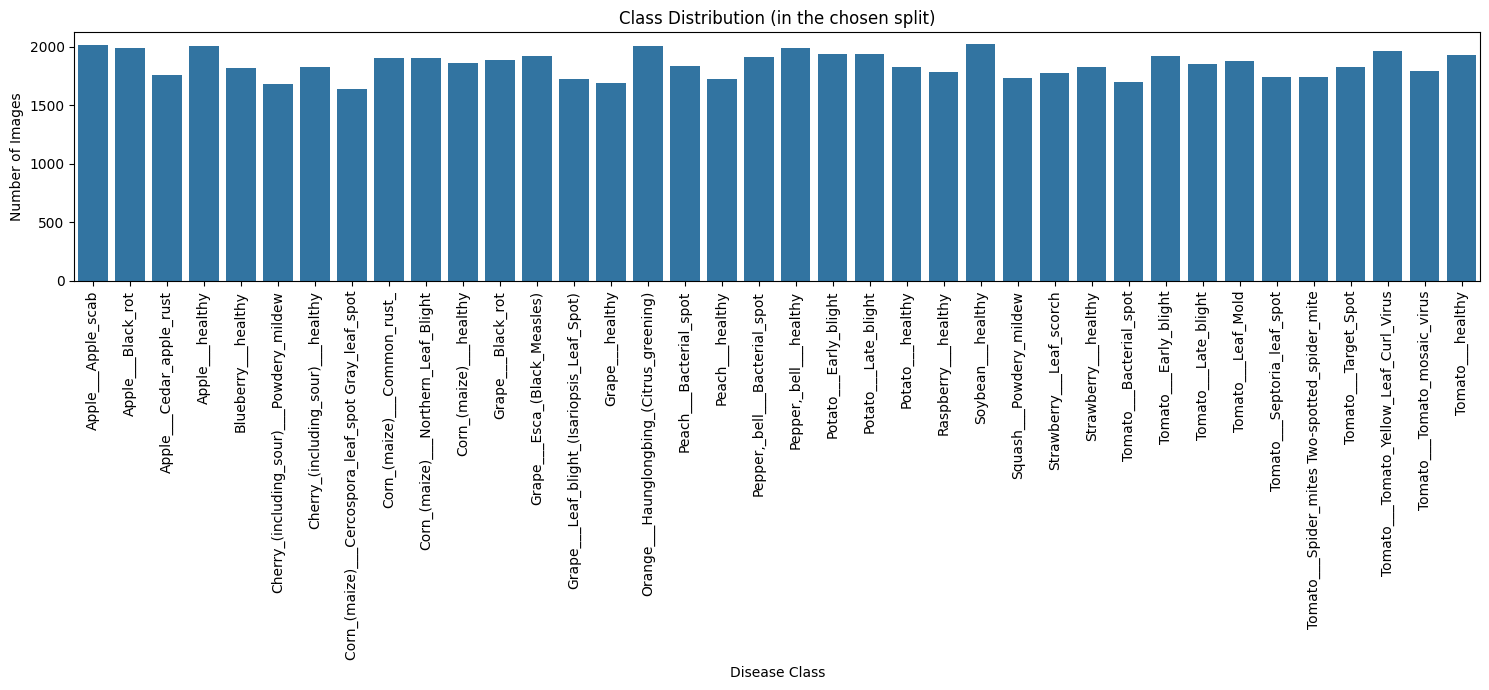

In [6]:
# Bar plot of class distribution
plt.figure(figsize=(15, 7))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution (in the chosen split)")
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize Sample Images

In [7]:
def show_sample_images(dataset_split_path, classes, samples_per_class=1):
    fig, axs = plt.subplots(len(classes), samples_per_class, figsize=(samples_per_class * 3, len(classes) * 3))

    # Ensure axs is always 2D for consistency
    if len(classes) == 1:
        axs = [axs]
    elif samples_per_class == 1:
        axs = [[ax] for ax in axs]

    for row, cls in enumerate(classes):
        class_path = os.path.join(dataset_split_path, cls)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if not image_files:
            print(f"No images found for class: {cls}")
            axs[row][0].axis("off")
            continue

        img_path = os.path.join(class_path, image_files[0])
        try:
            img = Image.open(img_path)
            axs[row][0].imshow(img)
            axs[row][0].axis("off")
            axs[row][0].set_title(cls)
        except Exception as e:
            print(f"Could not open image {img_path}: {e}")
            axs[row][0].axis("off")

    plt.tight_layout()
    plt.show()

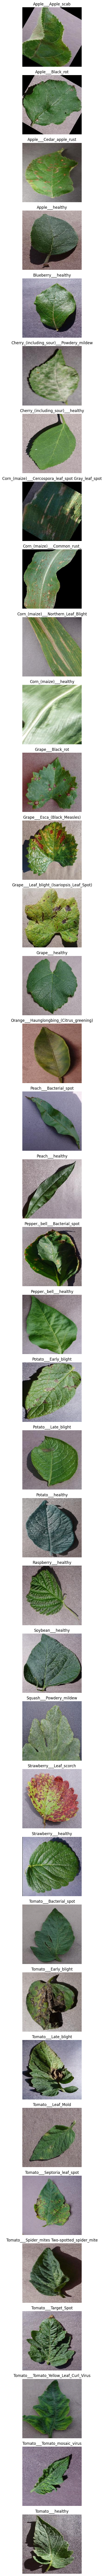

In [8]:
show_sample_images(SPLIT_PATH, classes)